# Blinkit project with python 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Codes\data analytics udemy\Blinkit python project\blinkit_data.csv")
df.head(20)
df.shape

(8523, 12)

### now analysing data 

In [4]:
#summary of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


OBS : we can change est year data type to year from int64 here but in dataset date is in whole number in years so int64 can also be okay if we dont change


### size of data

In [5]:
print("size of data:", df.shape)

size of data: (8523, 12)


### checking null values

In [6]:
df.isnull().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

OBS: null values only in weight column so i have to handle it later

## DATA CLEANING 

In [7]:
df_copy=df.copy() #making changes only in copy data so original data dont change

#### as i see form dataset that item fat column has some errors in name so fixing that now

In [8]:
print(df_copy['Item Fat Content'].unique())
print(df_copy['Item Fat Content'].value_counts()) # checking count to understand 
#what is more frequent name so we can replace which is less frequent


['Regular' 'Low Fat' 'low fat' 'LF' 'reg']
Item Fat Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


In [9]:
# df_copy['Item Fat Content']=df_copy['Item Fat Content'].replace('LF','Low Fat')
# df_copy['Item Fat Content']=df_copy['Item Fat Content'].str.replace('low fat','Low Fat')
# df_copy['Item Fat Content']=df_copy['Item Fat Content'].str.replace('reg','Regular')

# OR  use dictionary in replace
df_copy['Item Fat Content']=df_copy['Item Fat Content'].replace({'LF':'Low Fat',
                                                                 'low fat':'Low Fat',
                                                                 'reg':'Regular'
                                                                 })



In [10]:
#to show changes happen 
print(df_copy['Item Fat Content'].unique())

['Regular' 'Low Fat']


In [11]:
df_copy.head(5)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


<Axes: xlabel='Item Weight', ylabel='Count'>

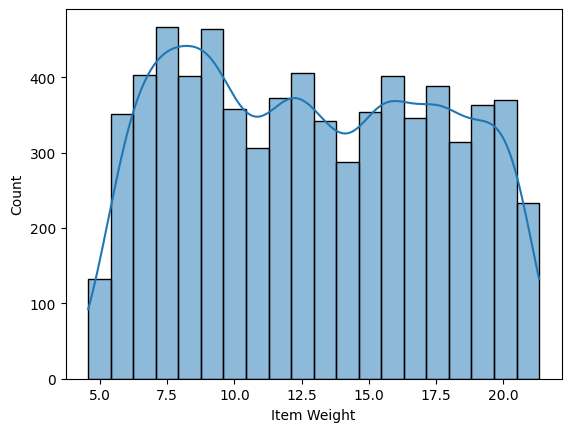

In [12]:
sns.histplot(df_copy['Item Weight'],kde=True)

#### As seen by distribution of data we can use mean to fill null values instead of NAN

In [13]:
df_copy['Item Weight']=df_copy['Item Weight'].fillna(df_copy['Item Weight'].mean())

In [14]:
df_copy['Item Weight'].isna().sum() #checking values filled or not

np.int64(0)

In [15]:
df_copy['Outlet Size'].unique() 

array(['Medium', 'Small', 'High'], dtype=object)

#### we can change high with large so more suitable

In [16]:
df_copy['Outlet Size']=df_copy['Outlet Size'].replace('High','Large')

In [17]:
df_copy['Outlet Size'].unique() #checking replaced or not

array(['Medium', 'Small', 'Large'], dtype=object)

#### cheking duplicates item

In [18]:
df_copy.duplicated().sum()

np.int64(0)

# Business Requirements

# KPI Requirements as per pdf  

In [19]:
# TOTAL SALES
total_sales=df_copy['Sales'].sum()
print(f"The total sale is : ${total_sales:,.0f}") # here .0f mean decimal ke baad kuch nhi

The total sale is : $1,201,681


In [20]:
# AVG REVENUE PER SALE
total_orders=df_copy['Item Identifier'].count()
avg_revenue=total_sales/total_orders
print(f"The total sale is : ${avg_revenue:,.1f}")
print(f"The total sale is : ${total_orders:,.0f}")

The total sale is : $141.0
The total sale is : $8,523


In [21]:
#AVG Rating
avg_rating=df_copy['Rating'].mean()
print(f"The total sale is : ${avg_rating:,.1f}")


The total sale is : $4.0


## Charts Requirements

### Total Sales by Fat-content

In [22]:
df_copy.head(5)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,Large,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


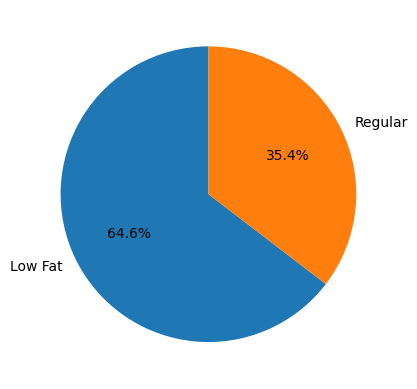

In [23]:
sales_by_fat=df_copy['Sales'].groupby(df_copy['Item Fat Content']).sum()
# print(sales_by_fat)
plt.pie(sales_by_fat,labels=sales_by_fat.index,autopct='%.1f%%',startangle=90)
plt.show()


#### total sales by item_type

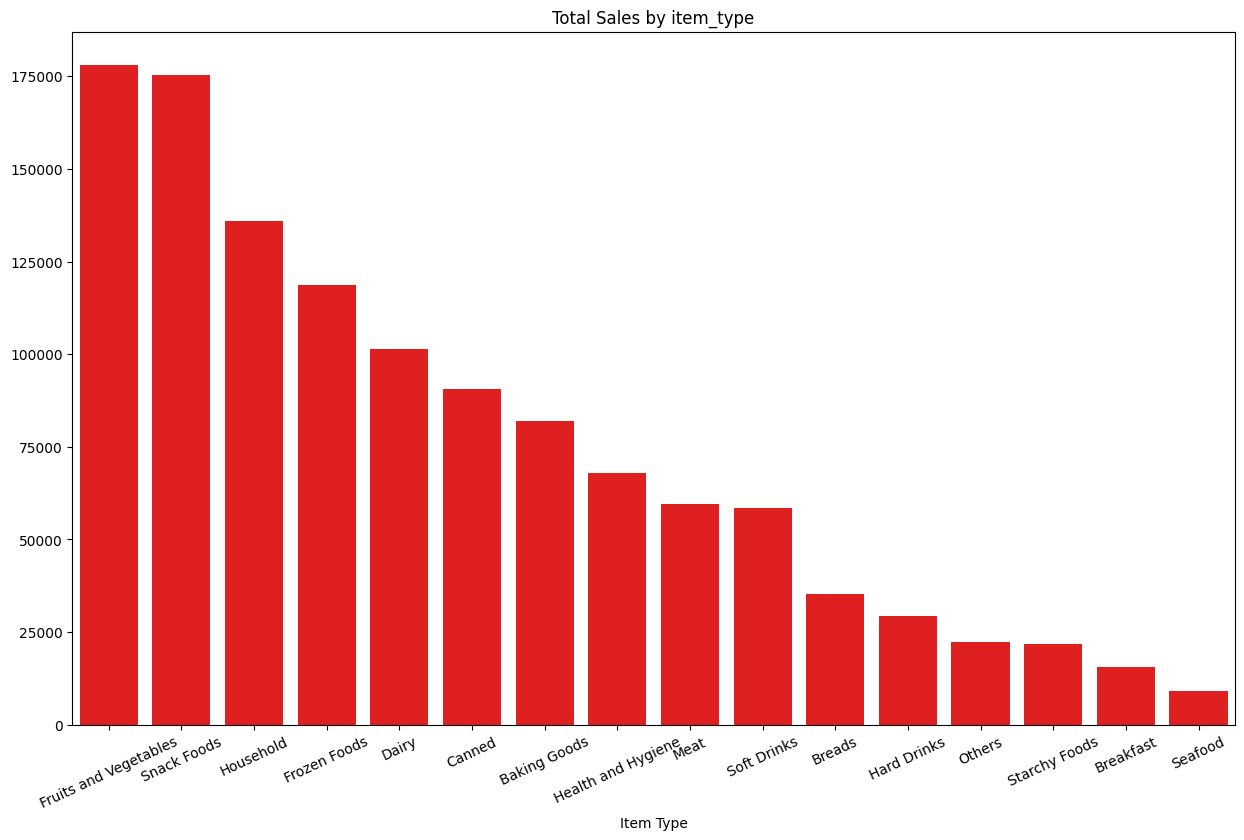

In [24]:
sales_by_itemtype=df_copy['Sales'].groupby(df_copy['Item Type']).sum().sort_values(ascending=False)
plt.figure(figsize=[15,9])
sns.barplot(x=sales_by_itemtype.index,y=sales_by_itemtype.values,color='red')
plt.xticks(rotation=25)
plt.title('Total Sales by item_type')
plt.show()

#### fat content by outlet for Total Sales 

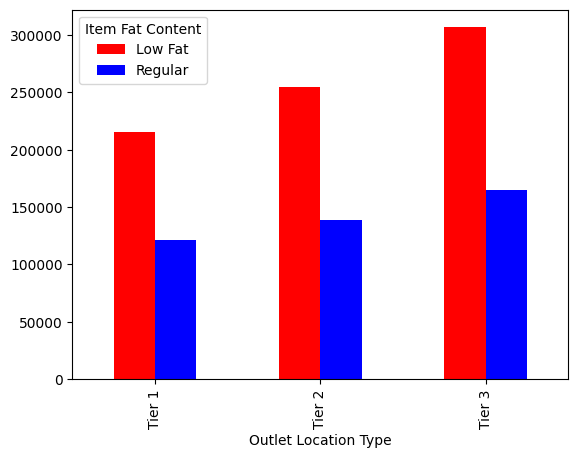

In [25]:
totalsales_by_outlets=df_copy.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack()
# sns.barplot(x=totalsales_by_outlets.index,y=totalsales_by_outlets.values)
totalsales_by_outlets.plot(kind='bar',color=['red','blue'])

plt.show()


#### total sales by outlet establishement

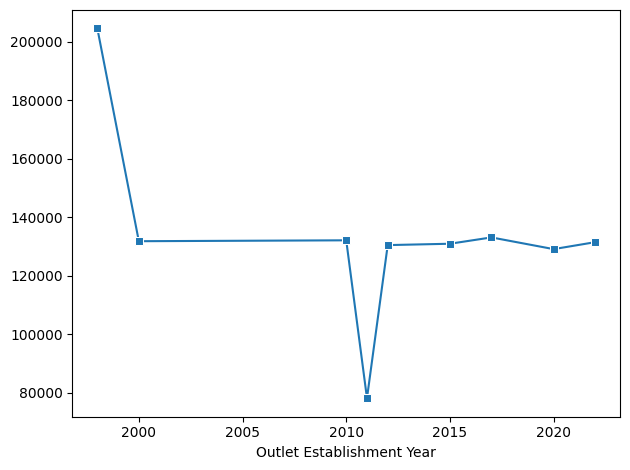

In [26]:
totalsales_outletest=df_copy.groupby('Outlet Establishment Year')['Sales'].sum()
# totalsales_outletest
# totalsales_outletest.plot(kind='line',marker='o')
sns.lineplot(x=totalsales_outletest.index,y=totalsales_outletest.values,marker='s')

plt.tight_layout()
plt.show()

#### sales by outlet size

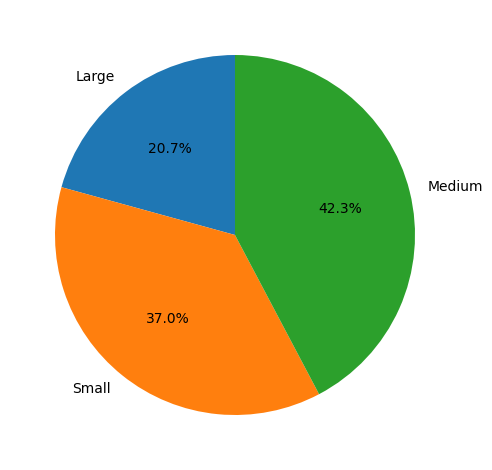

In [27]:
sales_by_outletsize=df_copy.groupby('Outlet Size')['Sales'].sum().sort_values()
# sales_by_outletsize.plot(kind='pie')
plt.pie(sales_by_outletsize,startangle=90,labels=sales_by_outletsize.index,autopct='%.1f%%')
plt.tight_layout()
plt.show()


# ML part starts

In [28]:
# Assuming the data is up to 2025 so addding outlet age column which is better for model
df_copy['Outlet Age'] = 2025 - df_copy['Outlet Establishment Year']


In [29]:
df_copy['Item Category'] = df_copy['Item Identifier'].apply(lambda x: x[0:2])
# Now map these to more readable names
df_copy['Item Category'] = df_copy['Item Category'].map({
    'FD': 'Food',
    'DR': 'Drinks',
    'NC': 'Non-Consumable'
})




In [30]:
df_copy=df_copy.drop(['Outlet Establishment Year','Item Identifier'],axis=1)

## standrisation and encoding start here

In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_copy['Outlet Size'] = le.fit_transform(df_copy['Outlet Size'])
# This will convert ['Small', 'Medium', 'High'] to [2, 1, 0] or similar. Check the mapping!

# Select categorical columns for one-hot encoding
categorical_cols = df_copy.select_dtypes(include=['object']).columns

# Use pandas get_dummies for simplicity
df_copy = pd.get_dummies(df_copy, columns=categorical_cols, drop_first=True)
# drop_first=True helps avoid multicollinearity

In [32]:
df_copy.head()

,Outlet Size,Item Visibility,Item Weight,Sales,Rating,Outlet Age,Item Fat Content_Regular,Item Type_Breads,Item Type_Breakfast,Item Type_Canned,...,Outlet Identifier_OUT045,Outlet Identifier_OUT046,Outlet Identifier_OUT049,Outlet Location Type_Tier 2,Outlet Location Type_Tier 3,Outlet Type_Supermarket Type1,Outlet Type_Supermarket Type2,Outlet Type_Supermarket Type3,Item Category_Food,Item Category_Non-Consumable
0,1,0.100014,15.10,145.4786,5.0,13,True,False,False,False,...,False,False,True,False,False,True,False,False,True,False
1,1,0.008596,11.80,115.3492,5.0,3,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
2,2,0.025896,13.85,165.0210,5.0,15,True,False,False,False,...,False,True,False,False,False,True,False,False,True,False
3,0,0.042278,12.15,126.5046,5.0,25,True,False,False,True,...,False,False,False,False,True,True,False,False,True,False
4,2,0.033970,19.60,55.1614,5.0,10,False,False,False,False,...,True,False,False,True,False,True,False,False,False,False


## Feature standardisation and splitting for train and test

In [33]:
#Define features and target
X = df_copy.drop('Sales', axis=1)
y = df_copy['Sales']

In [34]:
#split data into training and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model building and training starts

In [43]:
# --- 1. Import Necessary Libraries ---
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Assume X_train, X_test, y_train, y_test are already defined
# Assume X_train_scaled and X_test_scaled are also defined

# --- 2. Train Linear Regression Separately ---
# Linear Regression has no hyperparameters to tune, so we train it directly.
# It's good practice to use scaled data for linear models.
print("--- Training Linear Regression Model ---")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
print("Linear Regression training complete.\n")


# --- 3. Define Models and Grids for GridSearchCV ---
# We now only include models that require hyperparameter tuning.
models = {
    'SVR': SVR(),
    'RandomForest': RandomForestRegressor(random_state=42)
}

param_grids = {
    'SVR': {
        'kernel': ['linear', 'rbf'],
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto']
    },
    'RandomForest': {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }
}

# --- 4. Run GridSearchCV for Tunable Models ---

best_estimators = {}
# Add the pre-trained Linear Regression model to our collection of best models
best_estimators['LinearRegression'] = lr_model

for model_name in models:
    print(f"--- Running GridSearchCV for {model_name} ---")
    model = models[model_name]
    params = param_grids[model_name]

    # Use scaled data for SVR, and original data for RandomForest
    current_X_train = X_train_scaled if model_name == 'SVR' else X_train

    grid_search = GridSearchCV(estimator=model,
                               param_grid=params,
                               cv=3,
                               n_jobs=-1,
                               scoring='r2',
                               verbose=2)

    grid_search.fit(current_X_train, y_train)

    best_estimators[model_name] = grid_search.best_estimator_

    print(f"Best R2 Score for {model_name}: {grid_search.best_score_:.4f}")
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}\n")


# --- 5. Evaluate All Models on the Test Set ---
print("\n--- Evaluating Best Models on the Test Set ---")

for model_name, model in best_estimators.items():
    # Use the appropriate test data (scaled for LR and SVR)
    if model_name in ['LinearRegression', 'SVR']:
        current_X_test = X_test_scaled
    else:
        current_X_test = X_test

    # Make predictions
    y_pred = model.predict(current_X_test)
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # Calculate RMSE
    
    # Print results
    print(f"{model_name}:")
    print(f"  Test R2 Score: {r2:.4f}")
    print(f"  Test MAE: {mae:.2f}")
    print(f"  Test RMSE: {rmse:.2f}\n") # Print the new metric

--- Training Linear Regression Model ---
Linear Regression training complete.

--- Running GridSearchCV for SVR ---
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best R2 Score for SVR: -0.0009
Best Parameters for SVR: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}

--- Running GridSearchCV for RandomForest ---
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best R2 Score for RandomForest: 0.3638
Best Parameters for RandomForest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


--- Evaluating Best Models on the Test Set ---
LinearRegression:
  Test R2 Score: 0.0182
  Test MAE: 52.36
  Test RMSE: 62.36

SVR:
  Test R2 Score: -0.0020
  Test MAE: 52.86
  Test RMSE: 63.00

RandomForest:
  Test R2 Score: 0.5287
  Test MAE: 32.26
  Test RMSE: 43.21

